In [1]:
#!pip install haversine

In [2]:
import pandas as pd
from haversine import haversine
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 거리측정 함수

In [3]:
# 좌표끼리 거리 계산
def distance(df1, df2):
    df_new = []
    for i in range(len(df1)):
        start = (float(df1['위도'][i]), float(df1['경도'][i]))
        end = (float(df2['위도'].values), float(df2['경도'].values))
        dist = haversine(start, end, unit='m')
        df_new.append(dist)
    return(df_new)

# 더미화 및 500m 반경 안에 있는 합계 near_500에 저장
def change_num10(df1, df2):
    for i in range(len(df1)):
        for j in range(1,len(df2)+1):
            if df1.iloc[i,j] < 500:
                df1.iloc[i,j] = 1
            else:
                df1.iloc[i,j] = 0
    df1['near_500'] = df1.sum(axis=1)
    return(df1)

# 교통접근성 지수

## 강서구

In [4]:
gs_park = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/면적/강서구면적_1000이상.csv', encoding='cp949')
gs_train = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/교통접근성/강서구지하철.csv')
gs_bus = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/교통접근성/강서구_정류장.csv', encoding='cp949')

### 지하철역

In [5]:
gs_train['지하철역'] = gs_train['호선'] + '_' + gs_train['지하철역이름']

In [6]:
df_gs_train = pd.DataFrame(columns=['Name'])
df_gs_train['Name'] = gs_park['공원이름']

for i in gs_train['지하철역'].values:
    df_gs_train[i] = distance(gs_park, gs_train[gs_train['지하철역']==i])
    
df_gs_train

,Name,05호선_발산,05호선_우장산,05호선_화곡,05호선_까치산,05호선_김포공항,05호선_송정,05호선_방화,09호선_양천향교,09호선_김포공항,09호선_가양,공항철도_마곡나루,09호선_염창,09호선_개화,09호선_신방화,09호선_증미,02호선_까치산
0,이 수,3436.314861,3356.811963,3082.941234,3052.337974,6654.416229,5687.562217,6331.009123,3675.880593,6654.416229,2286.892622,4491.494840,150.932152,7520.928213,5527.695009,1498.403666,3052.337974
1,도 림,2247.077617,2459.767139,2518.848581,3006.454795,5501.912678,4529.845256,5043.986411,2373.797060,5501.912678,984.829676,3219.768177,1431.137508,6253.147795,4290.018746,220.175023,3006.454795
2,한마음,532.748358,1436.014044,2120.934641,3204.797430,3724.316710,2756.944781,3285.077905,896.665331,3724.316710,994.306785,1432.243404,3171.748087,4456.548440,2475.943756,1683.225538,3204.797430
3,새나라,1306.805434,1982.530176,2447.988020,3342.557663,4493.566474,3530.586786,3888.485349,1211.919118,4493.566474,214.805256,2088.024982,2589.347457,5113.721834,3192.881564,987.003683,3342.557663
4,백 합,648.888016,1392.273516,2010.570564,3057.871241,3888.287611,2917.962835,3489.535708,1066.716559,3888.287611,868.531425,1635.580794,2971.877902,4655.911170,2666.541420,1508.263374,3057.871241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,마곡지구6,1424.725059,2029.648153,2902.203021,4112.515874,1914.733510,983.510763,1782.741136,1726.102794,1914.733510,2805.553692,732.074367,4954.937492,2741.174940,701.999507,3521.411254,4112.515874
72,마곡지구1,1092.935342,1218.709891,2054.097969,3251.244857,2297.658112,1352.779797,2661.845541,1955.841841,2297.658112,2603.110093,1319.125903,4444.869654,3511.069821,1529.843932,3193.455270,3251.244857
73,마곡지구2,2577.600577,1842.099170,2048.168384,2835.142730,2681.505665,2181.589470,3959.776365,3620.356909,2681.505665,3925.128616,3015.911711,5114.410795,4403.157889,2838.044842,4296.109975,2835.142730
74,등촌동,2059.531030,1918.842712,1791.165434,2218.185195,5224.777445,4263.361376,5056.826257,2560.078558,5224.777445,1353.383086,3201.011385,1514.328726,6189.905039,4165.286942,936.616386,2218.185195


In [7]:
change_num10(df_gs_train, gs_train)

,Name,05호선_발산,05호선_우장산,05호선_화곡,05호선_까치산,05호선_김포공항,05호선_송정,05호선_방화,09호선_양천향교,09호선_김포공항,09호선_가양,공항철도_마곡나루,09호선_염창,09호선_개화,09호선_신방화,09호선_증미,02호선_까치산,near_500
0,이 수,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,도 림,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,한마음,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,새나라,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,백 합,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,마곡지구6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,마곡지구1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,마곡지구2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,등촌동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#df_gs_train[df_gs_train['near_500']==1]

In [9]:
# for i in range(len(df_gs_train)):
#     for j in range(1,len(gs_train)+1):
#         if df_gs_train.iloc[i,j] < 2:
#             df_gs_train.iloc[i,j] = 1
#         else:
#             df_gs_train.iloc[i,j] = 0
# df_gs_train.head()

### 버스정류장

In [10]:
gs_bus.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
df_gs_bus = pd.DataFrame(columns=['Name'])
df_gs_bus['Name'] = gs_park['공원이름']

for i in gs_bus['정류소'].values:
    df_gs_bus[i] = distance(gs_park, gs_bus[gs_bus['정류소']==i])
    
df_gs_bus

,Name,신월동기점-1,염창역.서울도시가스-1,등촌역.강서보건소-1,등촌중학교 백석초등학교-1,등촌중학교 백석초등학교-2,강서구청사거리.서울디지털대학교-1,강서구청사거리.서울디지털대학교-2,KBS스포츠월드-1,KBS스포츠월드-2,...,등촌주공8단지-1,대한항공화물청사-1,대한항공훈련센터-1,김포공항화물청사-1,김포공항세관.국립항공박물관-1,강원슈퍼-2,대한항공빌딩-1,대한항공-4,김포공항국제선-5,대한항공훈련센터-2
0,이 수,3771.089417,183.837359,511.869751,1232.926164,1326.580387,1793.755525,1952.192178,2305.507325,2418.652143,...,2466.057846,5389.065715,5401.528460,5589.156710,5885.425165,2083.354406,5279.565507,5102.121803,6735.102405,5480.056435
1,도 림,3580.536801,1485.653196,888.978220,348.875580,364.626170,627.699194,775.379951,1097.219000,1210.890468,...,1164.480798,4383.213289,4501.308267,4548.988351,4808.531759,2286.687459,4290.126577,4137.783279,5558.095219,4586.284551
2,한마음,3431.426361,3239.956927,2577.453375,1834.519702,1742.207829,1274.081332,1118.802033,766.574348,659.148502,...,794.790912,2809.381795,3083.468843,2917.462272,3119.874355,3026.105488,2746.864698,2645.117393,3762.632529,3172.330422
3,새나라,3721.809383,2646.942357,2021.398230,1298.923673,1220.364201,818.003958,722.858194,556.597079,567.391552,...,16.917144,3579.964898,3821.439447,3696.933435,3903.524715,2923.871493,3511.307933,3397.662697,4520.723373,3910.079893
4,백 합,3319.580524,3040.940003,2376.610546,1634.847029,1542.051875,1073.725212,917.118468,563.739306,454.586808,...,684.660580,2911.442911,3152.507724,3034.690540,3253.500896,2840.861841,2841.146141,2726.832483,3934.698492,3241.230891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,마곡지구6,3992.599092,5028.552852,4357.429752,3628.760321,3534.726370,3071.617229,2912.145534,2562.634234,2448.105052,...,2598.466470,1561.782572,2092.034987,1501.795620,1529.348086,4336.554562,1590.634263,1640.330777,1930.005960,2164.741074
72,마곡지구1,3101.453644,4524.670593,3857.666916,3174.331470,3082.027569,2651.373593,2497.381023,2182.550185,2073.036881,...,2411.854813,1188.865820,1536.893079,1299.110528,1537.458759,3562.497622,1137.017983,1069.563561,2407.482030,1623.497674
73,마곡지구2,2309.489187,5200.831830,4600.812169,4079.584029,4002.222476,3686.508070,3565.514605,3354.875088,3272.596665,...,3772.244932,1115.145224,595.946028,1376.592860,1728.145097,3579.948972,998.889088,845.711249,2915.637687,612.559892
74,등촌동,2792.748664,1595.333879,937.179854,457.334377,426.829927,616.772829,721.936959,1033.988792,1129.355728,...,1443.346969,3943.127072,3974.390636,4142.125630,4440.104369,1562.577401,3834.946674,3660.382606,5316.171117,4054.991809


In [12]:
change_num10(df_gs_bus, gs_bus)

,Name,신월동기점-1,염창역.서울도시가스-1,등촌역.강서보건소-1,등촌중학교 백석초등학교-1,등촌중학교 백석초등학교-2,강서구청사거리.서울디지털대학교-1,강서구청사거리.서울디지털대학교-2,KBS스포츠월드-1,KBS스포츠월드-2,...,대한항공화물청사-1,대한항공훈련센터-1,김포공항화물청사-1,김포공항세관.국립항공박물관-1,강원슈퍼-2,대한항공빌딩-1,대한항공-4,김포공항국제선-5,대한항공훈련센터-2,near_500
0,이 수,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
1,도 림,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
2,한마음,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
3,새나라,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
4,백 합,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,마곡지구6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
72,마곡지구1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
73,마곡지구2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74,등촌동,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


## 송파구

In [13]:
sp_park = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/면적/송파구면적_1000이상.csv', encoding='cp949')
sp_train = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/교통접근성/송파구지하철.csv')
sp_bus = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/교통접근성/송파구_정류장.csv', encoding='cp949')

### 지하철역

In [14]:
sp_train['지하철역'] = sp_train['호선'] + '_' + sp_train['지하철역이름']

In [15]:
df_sp_train = pd.DataFrame(columns=['Name'])
df_sp_train['Name'] = sp_park['공원이름']

for i in sp_train['지하철역'].values:
    df_sp_train[i] = distance(sp_park, sp_train[sp_train['지하철역']==i])
    
df_sp_train

,Name,02호선_잠실나루,02호선_잠실,02호선_잠실새내,02호선_종합운동장,03호선_가락시장,03호선_경찰병원,03호선_오금,05호선_올림픽공원,05호선_방이,...,08호선_장지,08호선_복정,09호선_종합운동장,09호선_삼전,09호선_석촌고분,09호선_석촌,09호선_송파나루,09호선_한성백제,09호선_올림픽공원,분당선_복정
0,송파나루,29187.134411,28821.723223,27394.692670,26321.558178,29575.331385,30200.144970,30666.318706,31304.527479,30684.687328,...,29981.031671,29885.412861,26321.558178,6.825206e+06,6.825892e+06,28954.586897,6.827009e+06,6.827596e+06,31304.527479,29885.412861
1,잠 실,2369.454326,1812.823846,637.033514,1071.580854,3367.477366,3740.081758,3902.246256,4262.134357,3713.853637,...,4804.529389,5495.745334,1071.580854,6.801717e+06,6.802398e+06,2014.154961,6.803513e+06,6.804099e+06,4262.134357,5495.745334
2,삼 전,2228.769248,1507.776205,1136.554412,1898.284339,2540.184090,2926.762285,3140.785641,3689.657513,3041.025670,...,4000.487578,4726.196414,1898.284339,6.801484e+06,6.802164e+06,1309.068925,6.803279e+06,6.803865e+06,3689.657513,4726.196414
3,송 파,731.395890,390.447565,1830.183206,2933.334421,2655.165827,2606.630002,2344.508602,2145.695923,1835.487892,...,4344.044823,5254.963465,2933.334421,6.799681e+06,6.800361e+06,1013.847172,6.801476e+06,6.802062e+06,2145.695923,5254.963465
4,방 이,1131.117260,1023.638706,2458.580949,3564.445711,2463.561989,2261.964158,1854.554077,1512.878589,1248.273130,...,4116.454161,5060.143520,3564.445711,6.799254e+06,6.799934e+06,1165.882161,6.801049e+06,6.801634e+06,1512.878589,5060.143520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,백제초기적석총,2106.128499,1350.588627,1828.752214,2762.465836,1713.263231,2031.761731,2238.487843,2943.488800,2207.313179,...,3298.968911,4114.610031,2762.465836,6.800942e+06,6.801623e+06,549.488925,6.802737e+06,6.803323e+06,2943.488800,4114.610031
136,방이동고분,1910.820125,1558.774165,2854.008405,3942.002531,1706.879544,1443.521861,1083.431453,1444.014122,711.836693,...,3319.977932,4272.360621,3942.002531,6.799517e+06,6.800197e+06,1022.854813,6.801312e+06,6.801897e+06,1444.014122,4272.360621
137,성내천,5476.259507,5235.270219,6470.437731,7512.159317,3350.652981,2794.628592,2624.553199,3295.716583,3105.200414,...,3159.545470,3744.850649,7512.159317,6.798307e+06,6.798986e+06,4511.687349,6.800100e+06,6.800685e+06,3295.716583,3744.850649
138,탄천,16089.354723,15343.113088,15239.632499,15369.491165,12947.145005,13358.713955,14078.955096,15643.010847,14804.169116,...,11467.002447,10515.731858,15369.491165,6.810512e+06,6.811189e+06,14378.243641,6.812302e+06,6.812886e+06,15643.010847,10515.731858


In [16]:
change_num10(df_sp_train, sp_train)

,Name,02호선_잠실나루,02호선_잠실,02호선_잠실새내,02호선_종합운동장,03호선_가락시장,03호선_경찰병원,03호선_오금,05호선_올림픽공원,05호선_방이,...,08호선_복정,09호선_종합운동장,09호선_삼전,09호선_석촌고분,09호선_석촌,09호선_송파나루,09호선_한성백제,09호선_올림픽공원,분당선_복정,near_500
0,송파나루,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,잠 실,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,삼 전,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,송 파,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,방 이,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,백제초기적석총,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,방이동고분,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,성내천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
138,탄천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 버스정류장

In [17]:
sp_bus.drop(['Unnamed: 0'], axis=1, inplace=True)

In [18]:
df_sp_bus = pd.DataFrame(columns=['Name'])
df_sp_bus['Name'] = sp_park['공원이름']

for i in sp_bus['정류소'].values:
    df_sp_bus[i] = distance(sp_park, sp_bus[sp_bus['정류소']==i])
    
df_sp_bus

,Name,잠실역.잠실대교.남단-1,잠실역.잠실대교.남단-2,석촌호수.한솔병원-1,석촌호수.한솔병원-2,석촌역-1,석촌역-2,송파역-1,송파역-2,가락시장.가락시장역-1,...,장미광장-1,한성백제박물관-2,올림픽공원평화의문-1,롯데월드-1,잠실종합운동장-3,오륜초등학교.올림픽선수촌아파트-1,송파레미니스아파트-1,송파레미니스아파트-2,오금대림아파트.오금초등학교-1,잠실역-3
0,송파나루,28557.769037,28587.024993,28891.490355,28852.635331,29054.983188,29015.892636,29222.844907,29172.993691,29528.094174,...,30859.233566,30321.838291,29986.556855,28327.786644,26480.962447,31303.623511,31581.821797,31608.510733,31251.469691,28573.577771
1,잠 실,1634.112180,1592.467363,1906.532316,1857.953789,2201.273169,2150.890310,2531.216569,2462.524209,3193.124848,...,3835.750165,3278.299602,2962.008285,1323.784432,967.878082,4330.826949,4665.279407,4682.280745,4278.955589,1623.244667
2,삼 전,1510.692848,1359.192868,1249.423698,1215.678001,1443.648827,1397.787118,1730.118258,1663.926872,2367.180215,...,3218.805635,2756.737544,2521.908821,1134.457310,1788.749632,3661.315086,3964.567971,3986.392877,3609.089258,1463.383171
3,송 파,727.054786,628.638635,868.052573,839.755482,1259.140372,1227.096683,1658.969953,1606.263506,2427.674337,...,1809.817874,1142.646908,778.482993,881.126492,2775.616588,2387.380133,2785.686765,2787.446268,2339.980118,682.168311
4,방 이,1362.069806,1261.271540,1107.283080,1114.791245,1302.791829,1295.659490,1586.255526,1556.627021,2244.900998,...,1177.616286,511.531665,293.392042,1501.811551,3407.471995,1765.335748,2172.896063,2171.139378,1719.615846,1319.680496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,백제초기적석총,1572.767142,1348.084906,612.206979,624.124122,567.340425,531.493583,823.604774,756.285443,1517.094053,...,2437.942049,2105.412020,1991.394572,1277.704060,2638.304349,2821.008852,3096.003030,3121.302821,2769.124910,1500.051865
136,방이동고분,1936.204040,1762.916391,1100.059371,1146.709437,960.910345,989.002985,1016.371725,1020.536216,1502.214485,...,923.832862,832.007550,1043.239654,1932.334186,3793.700035,1332.056869,1663.227721,1678.606422,1279.871610,1873.741122
137,성내천,5612.374414,5438.292559,4656.692964,4714.797844,4292.088461,4344.105120,3962.984194,4029.521669,3439.169006,...,3271.942086,3987.053894,4422.752054,5592.448087,7375.092803,2682.077034,2261.339074,2282.949122,2714.060854,5550.513882
138,탄천,15541.855618,15327.068796,14530.222550,14566.519796,14144.177801,14170.795136,13791.727223,13829.827963,13150.618194,...,15203.095138,15479.852356,15647.759812,15200.002946,15379.733721,14986.957500,14799.437128,14849.618686,14969.807860,15473.476878


In [19]:
change_num10(df_sp_bus, sp_bus)

,Name,잠실역.잠실대교.남단-1,잠실역.잠실대교.남단-2,석촌호수.한솔병원-1,석촌호수.한솔병원-2,석촌역-1,석촌역-2,송파역-1,송파역-2,가락시장.가락시장역-1,...,한성백제박물관-2,올림픽공원평화의문-1,롯데월드-1,잠실종합운동장-3,오륜초등학교.올림픽선수촌아파트-1,송파레미니스아파트-1,송파레미니스아파트-2,오금대림아파트.오금초등학교-1,잠실역-3,near_500
0,송파나루,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,잠 실,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
2,삼 전,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
3,송 파,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
4,방 이,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,백제초기적석총,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
136,방이동고분,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
137,성내천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
138,탄천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 교통접근성 지수 변수들 나열

In [20]:
df_gs_train = df_gs_train[['Name', 'near_500']]
df_gs_bus = df_gs_bus[['Name', 'near_500']]
df_sp_train = df_sp_train[['Name', 'near_500']]
df_sp_bus = df_sp_bus[['Name', 'near_500']]

In [21]:
gangseo = pd.merge(df_gs_train, df_gs_bus, how='inner', on='Name')
gangseo.columns = ['공원이름', '지하철역수', '버스정류장수']
gangseo

,공원이름,지하철역수,버스정류장수
0,이 수,1.0,12.0
1,도 림,1.0,17.0
2,한마음,0.0,32.0
3,새나라,1.0,37.0
4,백 합,0.0,29.0
...,...,...,...
75,마곡지구6,0.0,22.0
76,마곡지구1,0.0,24.0
77,마곡지구2,0.0,2.0
78,등촌동,0.0,5.0


In [22]:
songpa = pd.merge(df_sp_train, df_sp_bus, how='inner', on='Name')
songpa.columns = ['공원이름', '지하철역수', '버스정류장수']
songpa

,공원이름,지하철역수,버스정류장수
0,송파나루,0.0,0.0
1,잠 실,0.0,12.0
2,삼 전,0.0,13.0
3,삼 전,0.0,9.0
4,삼 전,0.0,13.0
...,...,...,...
139,백제초기적석총,0.0,8.0
140,방이동고분,0.0,11.0
141,성내천,1.0,18.0
142,탄천,0.0,0.0


In [23]:
# # 중복 공원명 변경... 찾기만 하고 변경은 임의로^^
# park_gs = traffic_gs['park']
# park_gs[park_gs.duplicated(keep='last')]
# park_sp = traffic_sp['park']
# park_sp[park_sp.duplicated(keep='last')]

# 유동인구 지수

In [24]:
gs_pop = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/유동인구/강서구_동별유동인구.csv', encoding='cp949')
sp_pop = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/유동인구/송파구_동별유동인구.csv', encoding='cp949')

gs_park_dong = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/유동인구/강서구_공원_행정동.csv', encoding='cp949')
sp_park_dong = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/유동인구/송파구_공원_행정동.csv', encoding='cp949')

In [25]:
gs_pop['유동인구비율'] = gs_pop['인구']/sum(gs_pop['인구'])
sp_pop['유동인구비율'] = sp_pop['인구']/sum(sp_pop['인구'])

### 각 공원의 행정동명 변수 추가

- sp_park_dong 이상 주소 임의로 변경함
- NaN값 제거
- 아래 함수 송파지역 에러뜨는데, 사실 돌아감 .. 무시하고 넘어가자

In [26]:
def park_dong(df):
    df['행정동명'] = 0
    for i in range(len(df)):
        df['행정동명'][i] = df['ADDRESS'].str.split()[i][2]
    
park_dong(gs_park_dong)
park_dong(sp_park_dong)

TypeError: 'float' object is not subscriptable

## 강서구

In [27]:
gs_park_dong = pd.merge(gs_park_dong, gs_pop, how='inner', on='행정동명')
gs_park_dong = gs_park_dong[['공원이름', '행정동명', '유동인구비율']]

In [28]:
gangseo = pd.merge(gangseo, gs_park_dong, how='inner', on='공원이름')
gangseo.drop(['행정동명'], axis=1, inplace=True)
gangseo

,공원이름,지하철역수,버스정류장수,유동인구비율
0,이 수,1.0,12.0,0.065089
1,도 림,1.0,17.0,0.118500
2,한마음,0.0,32.0,0.118500
3,새나라,1.0,37.0,0.118500
4,백 합,0.0,29.0,0.118500
...,...,...,...,...
83,마곡지구6,0.0,22.0,0.087099
84,마곡지구1,0.0,24.0,0.087099
85,마곡지구2,0.0,2.0,0.023281
86,등촌동,0.0,5.0,0.118500


## 송파구

In [29]:
sp_park_dong = pd.merge(sp_park_dong, sp_pop, how='inner', on='행정동명')
sp_park_dong = sp_park_dong[['공원이름', '행정동명', '유동인구비율']]

In [30]:
songpa = pd.merge(songpa, sp_park_dong, how='inner', on='공원이름')
songpa.drop(['행정동명'], axis=1, inplace=True)
songpa

,공원이름,지하철역수,버스정류장수,유동인구비율
0,송파나루,0.0,0.0,0.123932
1,잠 실,0.0,12.0,0.194369
2,삼 전,0.0,13.0,0.025984
3,삼 전,0.0,13.0,0.025984
4,삼 전,0.0,9.0,0.025984
...,...,...,...,...
99,무궁화,2.0,11.0,0.120261
100,투구봉,2.0,14.0,0.120261
101,샛팽이,2.0,11.0,0.120261
102,능 골,2.0,14.0,0.120261


# 주변시설물지수

In [31]:
gs_soc = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/주변시설물/gs_soc.csv', encoding='cp949')
sp_soc = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/주변시설물/sp_soc.csv', encoding='cp949')

In [32]:
gs_soc.columns = ['공원이름', '복지시설', '의료기관', '도서관']
sp_soc.columns = ['공원이름', '복지시설', '의료기관', '도서관']

In [33]:
gangseo = pd.merge(gangseo, gs_soc, how='inner', on='공원이름')
songpa = pd.merge(songpa, sp_soc, how='inner', on='공원이름')

### 정규화

In [34]:
scaler=MinMaxScaler()
scaler.fit(gangseo[['지하철역수', '버스정류장수', '유동인구비율', '복지시설', '의료기관', '도서관']])
arr1 = scaler.transform(gangseo[['지하철역수', '버스정류장수', '유동인구비율', '복지시설', '의료기관', '도서관']])
gangseo_scaled = pd.DataFrame(arr1, columns=['지하철역수', '버스정류장수', '유동인구비율', '복지시설', '의료기관', '도서관'])

scaler.fit(songpa[['지하철역수', '버스정류장수', '유동인구비율', '복지시설', '의료기관', '도서관']])
arr2 = scaler.transform(songpa[['지하철역수', '버스정류장수', '유동인구비율', '복지시설', '의료기관', '도서관']])
songpa_scaled = pd.DataFrame(arr2, columns=['지하철역수', '버스정류장수', '유동인구비율', '복지시설', '의료기관', '도서관'])

In [35]:
gangseo_scaled['공원이름'] = gangseo['공원이름']
songpa_scaled['공원이름'] = songpa['공원이름']

In [36]:
gangseo_scaled

,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름
0,0.5,0.208333,0.186977,0.25,0.235294,0.5,이 수
1,0.5,0.312500,0.425843,0.00,0.247059,1.0,도 림
2,0.0,0.625000,0.425843,0.25,0.576471,1.0,한마음
3,0.5,0.729167,0.425843,0.50,0.717647,1.0,새나라
4,0.0,0.604167,0.425843,0.00,0.517647,0.5,채송화
...,...,...,...,...,...,...,...
65,0.0,0.416667,0.285409,0.00,0.152941,0.0,마곡지구6
66,0.0,0.458333,0.285409,0.00,0.305882,0.5,마곡지구1
67,0.0,0.000000,0.000000,0.00,0.000000,0.0,마곡지구2
68,0.0,0.062500,0.425843,0.00,0.023529,0.0,등촌동


In [37]:
songpa_scaled

,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름
0,0.000000,0.000000,0.588901,0.000000,0.000000,0.0,송파나루
1,0.000000,0.428571,1.000000,0.235294,0.238095,0.5,잠 실
2,0.666667,0.392857,0.588901,0.117647,0.345238,0.0,송 파
3,0.333333,0.500000,0.521730,0.117647,0.297619,0.0,방 이
4,0.000000,0.428571,0.259722,0.176471,0.136905,0.5,태 양
...,...,...,...,...,...,...,...
82,0.666667,0.392857,0.567478,0.294118,0.339286,0.0,무궁화
83,0.666667,0.500000,0.567478,0.294118,0.113095,0.0,투구봉
84,0.666667,0.392857,0.567478,0.294118,0.339286,0.0,샛팽이
85,0.666667,0.500000,0.567478,0.294118,0.113095,0.0,능 골


In [38]:
gangseo_scaled.to_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/강서구.csv', encoding='euc-kr')
songpa_scaled.to_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/송파구.csv', encoding='euc-kr')

# 가중치 부여

In [39]:
def weights(df):
    df['입지지수'] = 0
    df['입지지수'] = df['복지시설']*0.3 + df['지하철역수']*0.225 + df['버스정류장수']*0.225 + df['유동인구비율']*0.15 + df['의료기관']*0.07 + df['도서관']*0.03

weights(gangseo_scaled); weights(songpa_scaled);

In [40]:
gangseo_final = gangseo_scaled.sort_values(by='입지지수', axis=0, ascending=False)
songpa_final = songpa_scaled.sort_values(by='입지지수', axis=0, ascending=False)

In [41]:
gangseo_final

,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름,입지지수
16,1.0,0.333333,1.000000,1.00,0.752941,1.0,다 운,0.832706
24,1.0,0.479167,1.000000,0.75,0.800000,0.5,배다리,0.778813
26,1.0,0.354167,1.000000,0.75,0.623529,0.5,모 태,0.738335
20,1.0,0.312500,1.000000,0.25,0.788235,0.5,까치,0.590489
3,0.5,0.729167,0.425843,0.50,0.717647,1.0,새나라,0.570674
...,...,...,...,...,...,...,...,...
44,0.0,0.416667,0.000000,0.00,0.000000,0.0,꿈 빛,0.093750
46,0.0,0.250000,0.157663,0.00,0.011765,0.0,다 솔,0.080723
39,0.0,0.354167,0.000000,0.00,0.000000,0.0,광 명,0.079687
68,0.0,0.062500,0.425843,0.00,0.023529,0.0,등촌동,0.079586


In [42]:
songpa_final

,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름,입지지수
32,0.333333,1.000000,0.303465,1.000000,0.077381,1.0,장 수,0.680936
73,1.000000,0.678571,0.567478,0.411765,0.321429,0.0,봉우리,0.608830
19,0.000000,0.928571,0.403857,0.823529,0.107143,0.5,연 화,0.539066
10,1.000000,0.678571,0.567478,0.176471,0.297619,0.0,건너말,0.536575
34,0.000000,0.750000,0.403857,0.764706,0.130952,0.5,문 정,0.482907
...,...,...,...,...,...,...,...,...
52,0.000000,0.285714,0.017245,0.235294,0.178571,0.0,나루터,0.149961
12,0.000000,0.357143,0.000000,0.176471,0.178571,0.0,마 천,0.145798
22,0.000000,0.142857,0.259722,0.176471,0.077381,0.0,풍 납,0.129459
0,0.000000,0.000000,0.588901,0.000000,0.000000,0.0,송파나루,0.088335


In [43]:
gangseo_final.to_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/강서구_지수포함.csv', encoding='euc-kr')
songpa_final.to_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/송파구_지수포함.csv', encoding='euc-kr')

# 입지지수 시각화

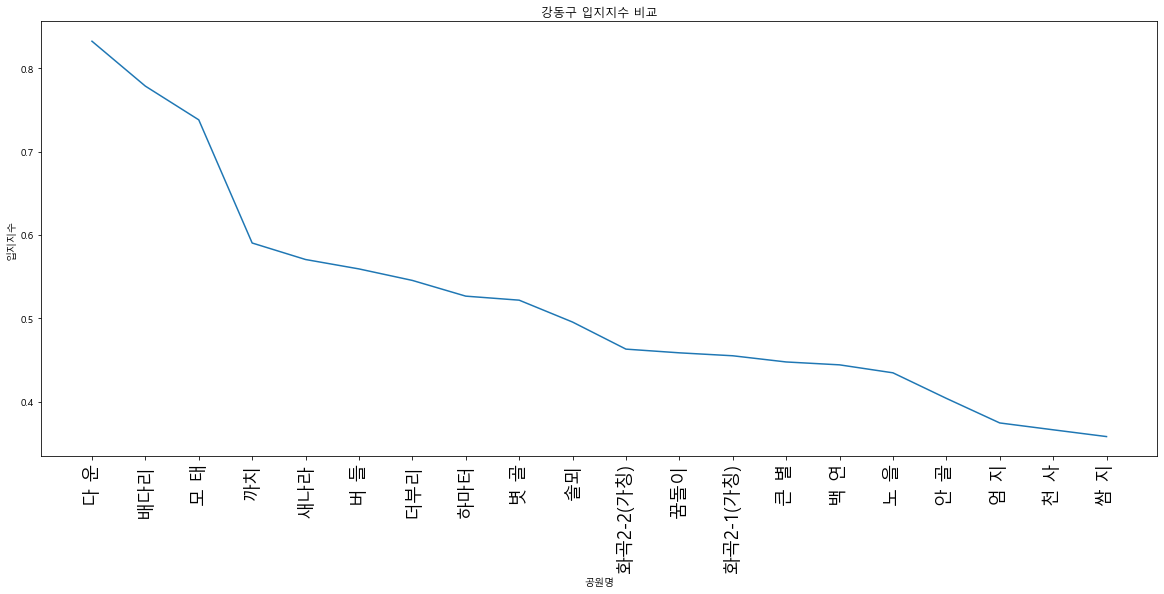

In [44]:
plt.figure(figsize=(20,8))
plt.plot(gangseo_final['공원이름'][0:20], gangseo_final['입지지수'][0:20])
#plt.axis(['다운','호돌이','0.6', '0.9'])
plt.xticks(fontsize=18, rotation=90)
plt.title('강동구 입지지수 비교')
plt.xlabel('공원명')
plt.ylabel('입지지수')
plt.show()

- TOP6: 다운, 배다리, 새나라, 더부리, 볏골, 솔뫼

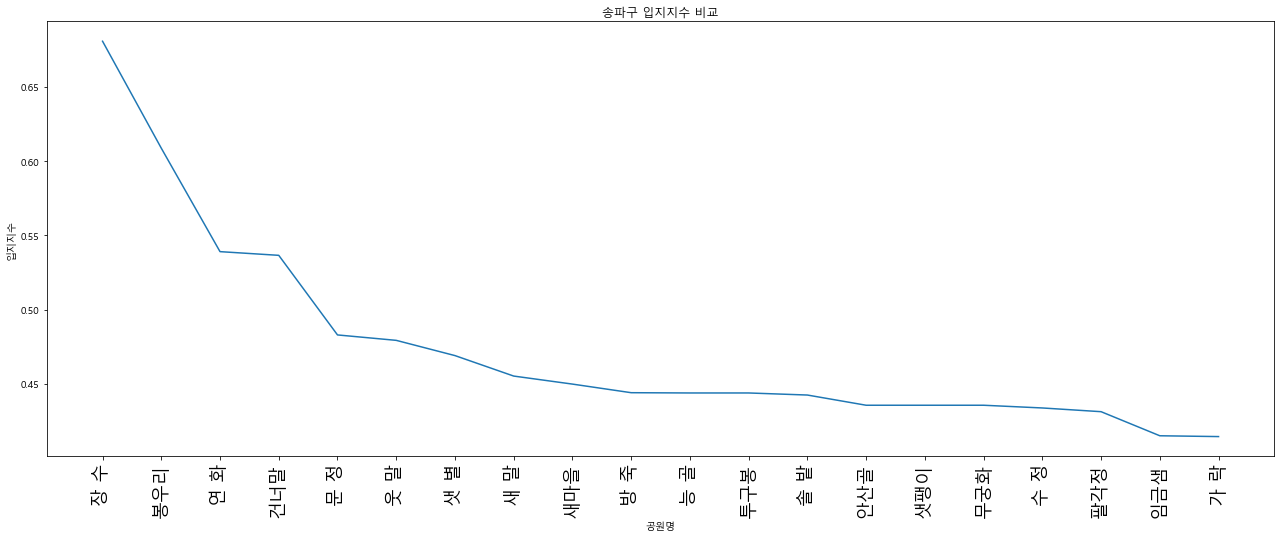

In [45]:
plt.figure(figsize=(22,8))
plt.plot(songpa_final['공원이름'][0:20], songpa_final['입지지수'][0:20])
plt.xticks(fontsize=18, rotation=90)
plt.title('송파구 입지지수 비교')
plt.xlabel('공원명')
plt.ylabel('입지지수')
plt.show()

- TOP4: 장수, 연화, 건너말, 문정